Dantar Alejandro Ortiz Vega 6-D

Analisis y Visualizacion de Datos

Universidad de Colima

Ingenieria en Computacion Inteligente

Facultad de Ingenieria Mecanica y Electrica

## Web Scrapping ##

El campo del web scraping, que implica la extracción automatizada de datos de sitios web, ha experimentado un crecimiento significativo en los últimos años debido al aumento en la disponibilidad de datos en línea y la demanda de información para análisis y toma de decisiones. Aquí hay algunas tendencias y aspectos clave del estado actual del campo:

Avances tecnológicos: Han surgido diversas herramientas y bibliotecas de software que facilitan el web scraping, como BeautifulSoup en Python, Scrapy, Selenium, entre otros. Estas herramientas ofrecen una amplia gama de funcionalidades para la extracción de datos estructurados y no estructurados.

Legalidad y ética: El aspecto legal y ético del web scraping ha sido objeto de debate y regulación. Algunos sitios web prohíben explícitamente la extracción automatizada de sus datos a través de sus políticas de uso, lo que ha llevado a disputas legales en algunos casos. La ética del web scraping también ha sido cuestionada en relación con la privacidad y la seguridad de los datos.

Desafíos técnicos: A medida que los sitios web evolucionan y se actualizan, los desafíos técnicos en el web scraping también cambian. Estos desafíos pueden incluir la detección y eludir de medidas de seguridad como CAPTCHA, la gestión de cambios en la estructura del sitio web y la optimización del rendimiento para manejar grandes volúmenes de datos.

Aplicaciones en diferentes industrias: El web scraping se utiliza en una amplia variedad de industrias y campos, incluyendo el comercio electrónico para monitorizar precios y competidores, la investigación académica para recopilar datos para análisis, el análisis de opiniones y sentimientos en redes sociales, entre otros.

Auge del scraping ético y legal: Con el aumento de la conciencia sobre la importancia de la ética y la legalidad en el web scraping, ha habido un crecimiento en el desarrollo de prácticas de "scraping ético" que se adhieren a las políticas de los sitios web y respetan la privacidad de los usuarios. Esto incluye el uso de APIs públicas cuando están disponibles en lugar de realizar scraping directo de páginas web.

En resumen, el campo del web scraping sigue siendo activo y en evolución, con continuos avances tecnológicos, desafíos legales y éticos, y una amplia gama de aplicaciones en diversas industrias.

https://wwww.amazon.com.mx/b/ref=nav__laptop/ref=s9_acss_bw_cg_pcstore_1b1_w?ie=UTF8&node=10189669011&pf_rd_m=A3TO6F13CSVUA&pf_rd_s=merchandise

In [14]:
import requests
from bs4 import BeautifulSoup
import csv

def scape_amazon_products(url):
    response = requests.get(url)

    if response.status_code == 200:
        html_content = response.content
        soup = BeautifulSoup(html_content, 'html.parser')
        product_containers = soup.find_all('div', class_='a-section a-spacing-none octopus-pc-item-block octopus-pc-asin-block')

        with open('Products_Amazon.csv', mode='w', newline='', encoding='utf-8') as file:

            writer = csv.writer(file)
            writer.writerow(['Producto', 'Precio'])
            for product in product_containers:
                product_name = product.find('span', class_='a-size-base a-color-base').text.strip()
                product_name = product_name.replace(',', '').replace('"','').replace('-','').replace('|','').replace('/','').replace(':','')
                price_element = product.find('span', class_='a-price')
                if price_element:
                    product_price = price_element.find('span', class_='a-price-whole').text.strip().replace('.','')
                    product_price = float(product_price.replace(',',''))
                else:
                    product_price = 'Precio no disponible'
                writer.writerow([product_name, product_price])
                
        print('Datos descargados correctamente en Products_Amazon.csv.')

    else:
        print('Error al realizar la solicitud.')
        


In [17]:

amazon_url = 'https://www.amazon.com.mx/b/ref=nav__laptop/ref=s9_acss_bw_cg_pcstore_1b1_w?ie=UTF8&node=10189669011&pf_rd_m=A3TO6F13CSVUA4&pf_rd_s=merchandised-search-10&pf_rd_r=AW64H8NXSNTDFPNGFAXZ&pf_rd_t=101&pf_rd_p=5bf9ce9a-8f41-4210-b7b9-49b5324c97c2&pf_rd_i=9687880011'
scape_amazon_products(amazon_url)

Datos descargados correctamente en Products_Amazon.csv.


In [18]:
import pandas as pd

data = pd.read_csv("Products_Amazon.csv")

print("Primeras filas del DataFrame:")
print(data.head())

print("\nInformación del DataFrame:")
print(data.info())

print("\nEstadísticas descriptivas del DataFrame:")
print(data.describe())

Primeras filas del DataFrame:
                                            Producto   Precio
0  Apple 2020 Laptop MacBook Air Chip M1 de Apple...  10999.0
1  HUAWEI Laptop MateBook D 15 Ryzen 7 5700U 16GB...  10679.0
2  HP Laptop 14em0001la AMD Ryzen 3 8 GB 256 GB S...   5909.0
3  Laptop Thin & Light Huawei MateBook D 16(Garan...  12659.0
4  Acer Nitro V Gaming Laptop  Procesador Intel C...  17707.0

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Producto  71 non-null     object 
 1   Precio    71 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None

Estadísticas descriptivas del DataFrame:
             Precio
count     71.000000
mean   11789.845070
std     8897.397043
min      132.000000
25%     6360.500000
50%    10999.000000
75%    16080.000000
max    46079.000000


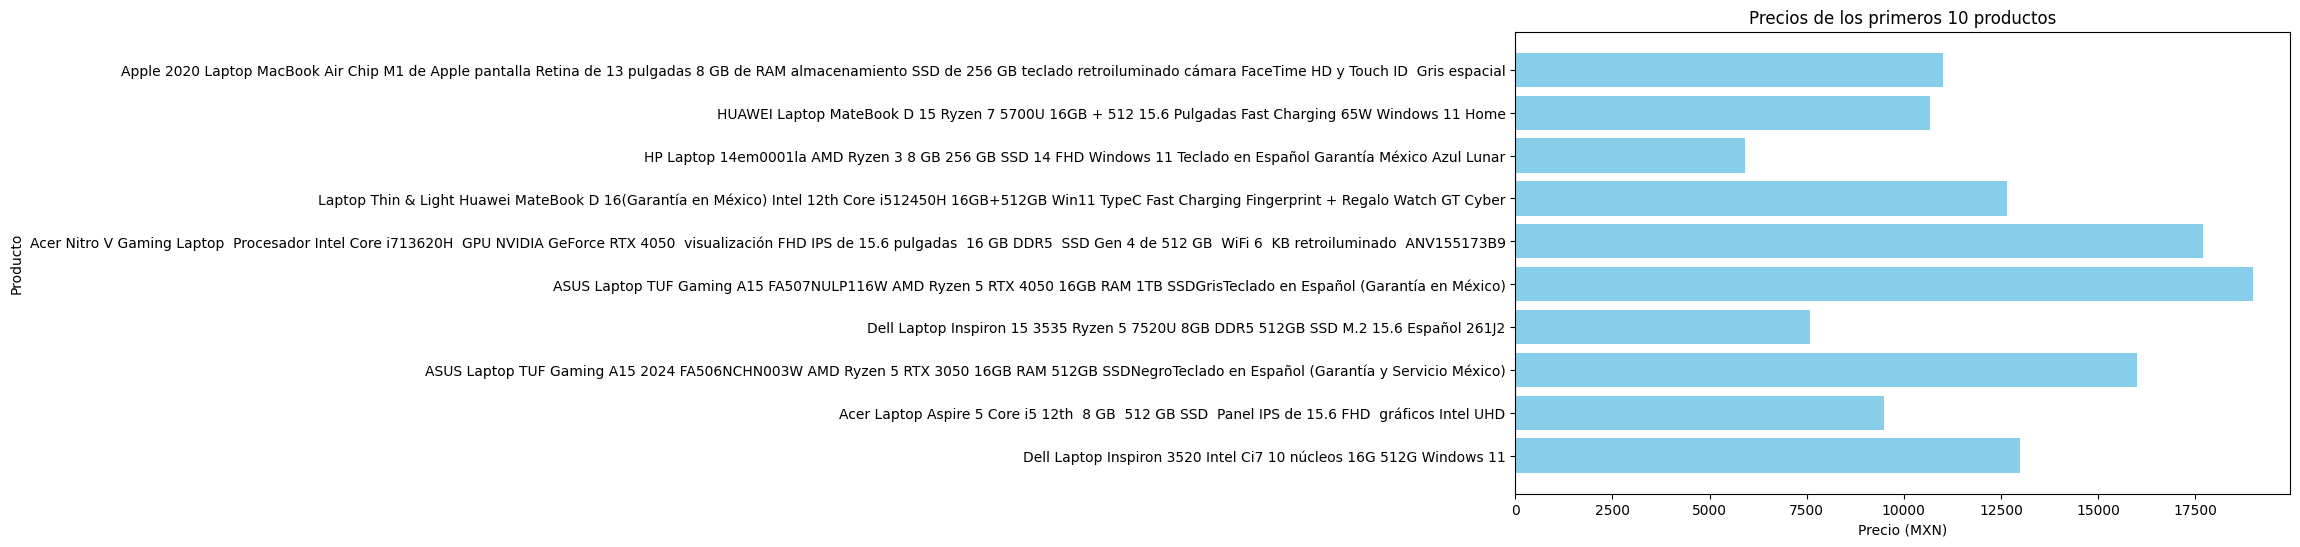

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('Products_Amazon.csv')  # Reemplaza 'ruta/a/tu/archivo.csv' con la ubicación de tu archivo CSV

# Graficar los primeros N productos y sus precios
N = 10  # Cambia N al número deseado de productos a graficar

plt.figure(figsize=(10, 6))
plt.barh(df['Producto'][:N], df['Precio'][:N], color='skyblue')
plt.xlabel('Precio (MXN)')
plt.ylabel('Producto')
plt.title(f'Precios de los primeros {N} productos')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más caro en la parte superior
plt.show()


C:\Users\Colibecas\AppData\Local\Temp\ipykernel_2028\1286574178.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


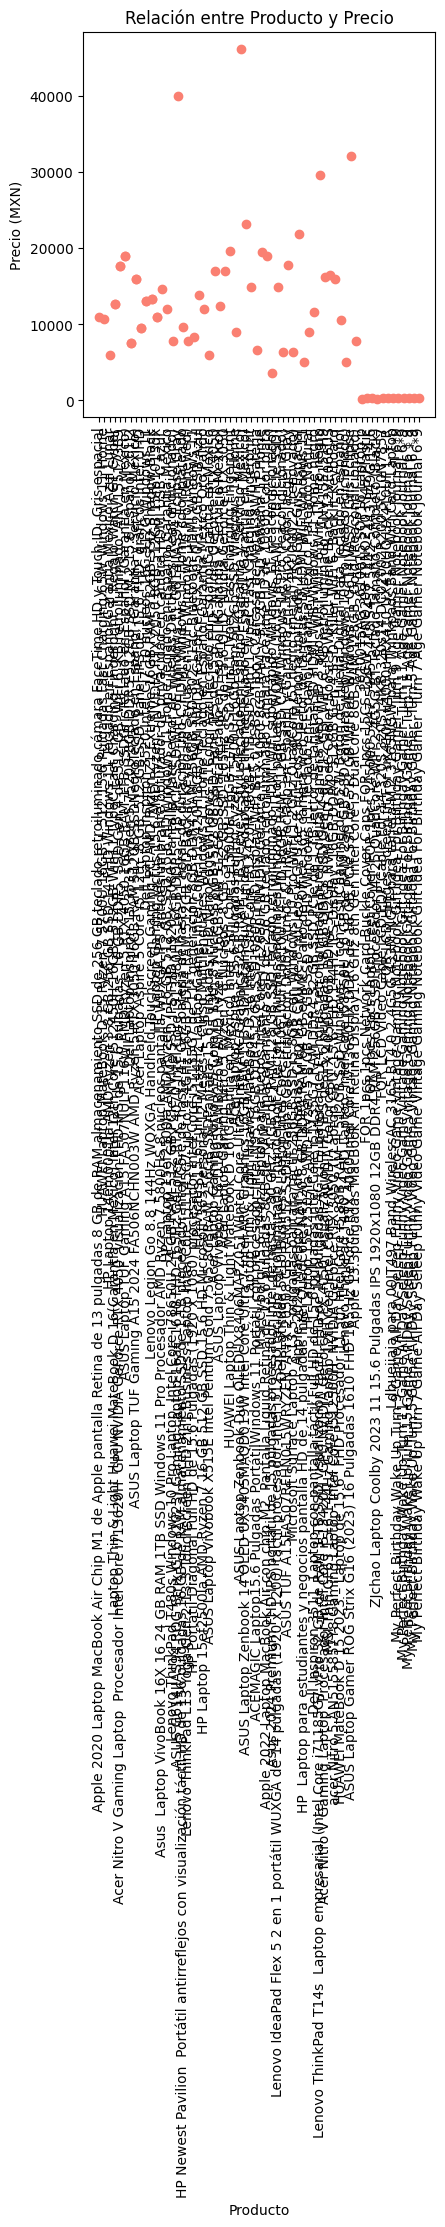

In [32]:
N = 10  # Cambia N al número deseado de productos a graficar

plt.figure(figsize=(10, 5))

# Gráfico de dispersión para la relación entre los nombres de los productos y sus precios
plt.subplot(1, 2, 2)
plt.scatter(df['Producto'], df['Precio'], color='salmon')
plt.xlabel('Producto')
plt.ylabel('Precio (MXN)')
plt.title('Relación entre Producto y Precio')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad

plt.tight_layout()
plt.show()


C:\Users\Colibecas\AppData\Local\Temp\ipykernel_2028\3414977515.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


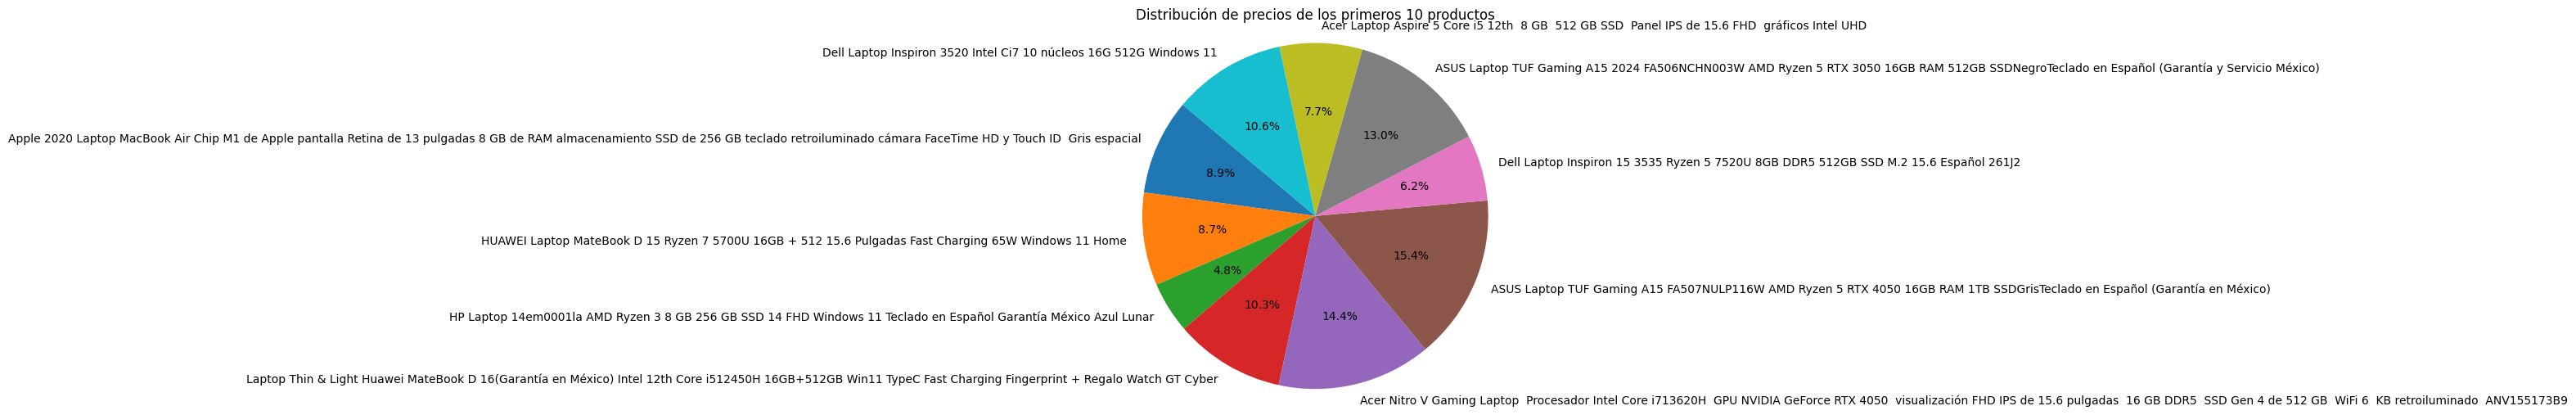

In [33]:
N = 10  # Cambia N al número deseado de productos a graficar

plt.figure(figsize=(6, 6))

# Gráfico de pastel para mostrar la distribución de los precios de los productos
plt.pie(df['Precio'][:N], labels=df['Producto'][:N], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.title('Distribución de precios de los primeros 10 productos')

plt.tight_layout()
plt.show()

Well professor, regarding this Web Scraping project, I really enjoyed it, but due to inefficiency, well not inefficiency but rather my inexperience in this field of web scraping, I struggled to grasp it at first. I encountered errors when trying to connect to the website I wanted, which was Amazon. After some investigation, I realized that my code was actually fine, but the issue was with the website not granting me permission to access it, resulting in the HTTP 503 error initially. Eventually, after some persistence, I managed to save the data into a CSV file. However, arranging the data was a bit challenging since there were so many entries, but I managed to do it using Pandas, albeit in a somewhat unusual manner (haha). Then, I proceeded to visualize the data with graphs. Although the scatter plot turned out a bit uneven, the bar and pie charts displayed the data nicely and aligned with what I wanted to showcase. So, professor, that would be all from my side. Thank you very much. I'll continue to improve my skills in web scraping

Dantar Alejandro Ortiz Vega 6-D

Facultad de Ingeniera Mecanica y Electrica

Universidad de COlima

Analisis y Visualizacion de datos

Ingenieria en Computacion Inteligente

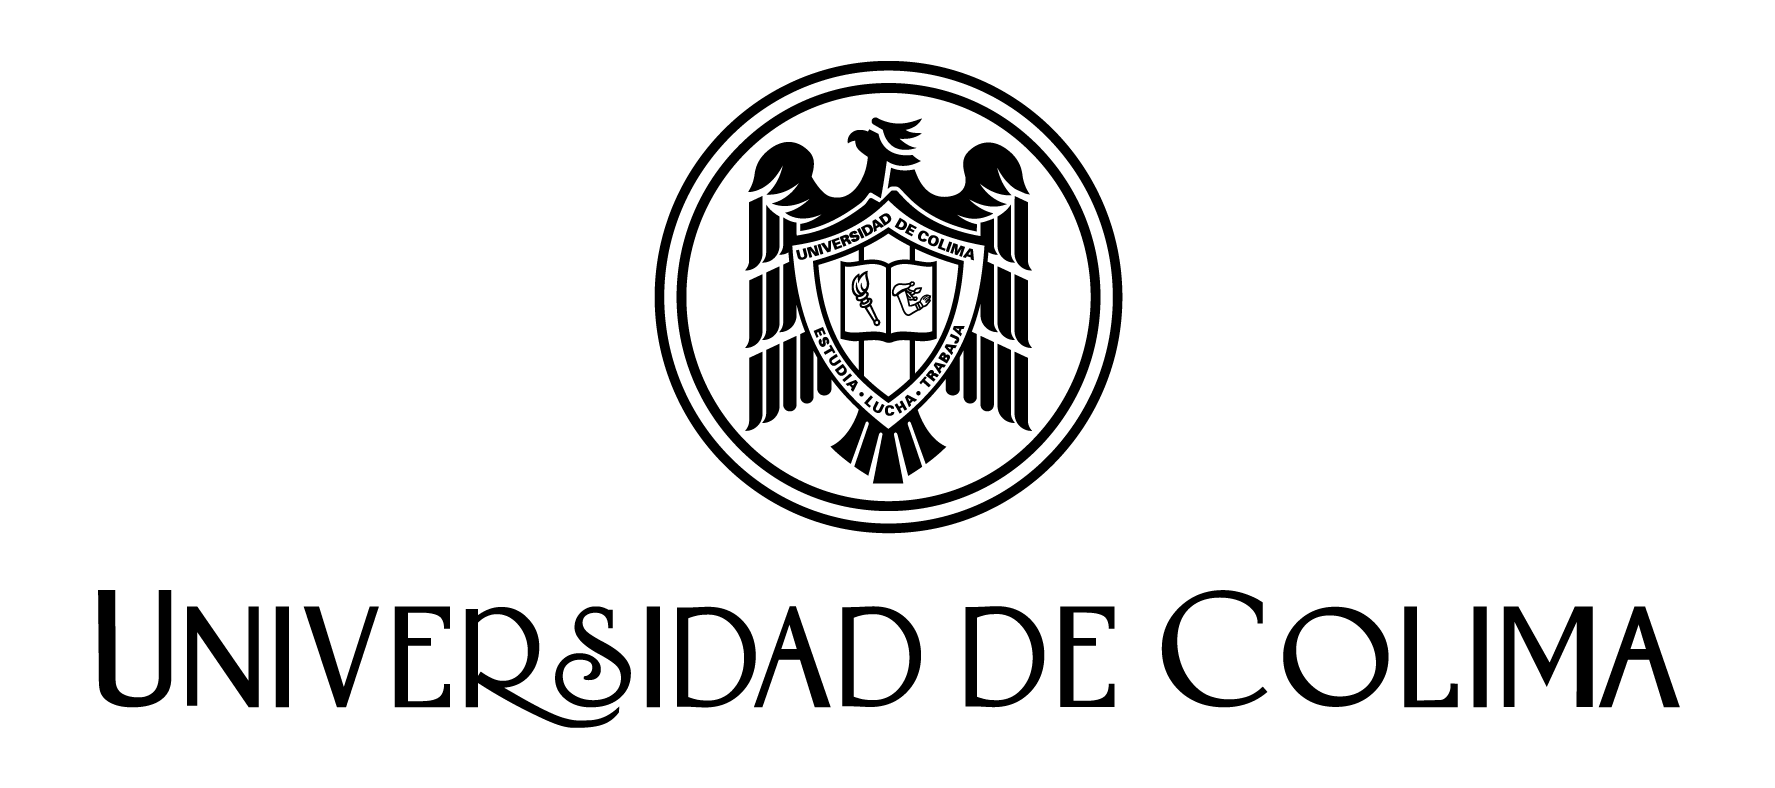